In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = wrangle.acquire_zillow()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,14297519,0.025595,2017-01-01
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,17052889,0.055619,2017-01-01
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,14186244,0.005383,2017-01-01
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,12177905,-0.103410,2017-01-01
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,6,12095076,-0.001011,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,77609,11000655,0.020615,2017-09-20
52438,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13,77610,17239384,0.013209,2017-09-21
52439,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13,77611,12773139,0.037129,2017-09-21
52440,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13,77612,12826780,0.007204,2017-09-25


In [3]:
df[df.isnull()==False].count()

id                          52442
parcelid                    52442
airconditioningtypeid       13638
architecturalstyletypeid       70
basementsqft                   47
                            ...  
censustractandblock         52319
id.1                        52442
parcelid.1                  52442
logerror                    52442
transactiondate             52442
Length: 63, dtype: int64

In [4]:
df.count()

id                          52442
parcelid                    52442
airconditioningtypeid       13638
architecturalstyletypeid       70
basementsqft                   47
                            ...  
censustractandblock         52319
id.1                        52442
parcelid.1                  52442
logerror                    52442
transactiondate             52442
Length: 63, dtype: int64

In [5]:
df.info

<bound method DataFrame.info of             id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      1727539  14297519                    NaN                       NaN   
1      1387261  17052889                    NaN                       NaN   
2        11677  14186244                    NaN                       NaN   
3      2288172  12177905                    NaN                       NaN   
4       781532  12095076                    1.0                       NaN   
...        ...       ...                    ...                       ...   
52437   673515  11000655                    NaN                       NaN   
52438  2968375  17239384                    NaN                       NaN   
52439  1843709  12773139                    1.0                       NaN   
52440  1187175  12826780                    NaN                       NaN   
52441  2455685  13083743                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcn

In [6]:
column_to_drop = []

for col in df.columns:
    if df[col].isnull().sum() > 18000:
        column_to_drop.append(col)

    

In [7]:
column_to_drop

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'decktypeid',
 'finishedfloor1squarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertyzoningdesc',
 'regionidneighborhood',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'numberofstories',
 'fireplaceflag',
 'taxdelinquencyflag',
 'taxdelinquencyyear']

In [8]:
df.airconditioningtypeid.isnull().sum()

38804

In [9]:
df.fireplaceflag.value_counts()

1.0    81
Name: fireplaceflag, dtype: int64

In [10]:
df.value_counts()

Series([], dtype: int64)

In [11]:
df = df.drop(columns=column_to_drop)

In [12]:
df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,14297519,0.025595,2017-01-01
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,17052889,0.055619,2017-01-01
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,14186244,0.005383,2017-01-01
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,12177905,-0.103410,2017-01-01
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,12095076,-0.001011,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,11000655,0.020615,2017-09-20
52438,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,17239384,0.013209,2017-09-21
52439,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,...,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,12773139,0.037129,2017-09-21
52440,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,77612,12826780,0.007204,2017-09-25


In [13]:
df[df.isnull()==False].count()

id                              52442
parcelid                        52442
bathroomcnt                     52442
bedroomcnt                      52442
calculatedbathnbr               52305
calculatedfinishedsquarefeet    52360
finishedsquarefeet12            52195
fips                            52442
fullbathcnt                     52305
latitude                        52442
longitude                       52442
lotsizesquarefeet               52073
propertycountylandusecode       52442
propertylandusetypeid           52442
rawcensustractandblock          52442
regionidcity                    51405
regionidcounty                  52442
regionidzip                     52416
roomcnt                         52442
yearbuilt                       52326
structuretaxvaluedollarcnt      52358
taxvaluedollarcnt               52441
assessmentyear                  52442
landtaxvaluedollarcnt           52441
taxamount                       52438
censustractandblock             52319
id.1        

In [14]:
df.parcelid.value_counts()

13083743    3
11991059    3
12478591    2
12035592    2
12443331    2
           ..
11494547    1
10976762    1
12650619    1
12650850    1
12826780    1
Name: parcelid, Length: 52320, dtype: int64

In [15]:
df.id.value_counts()

2455685    3
1968735    3
1535169    2
2079054    2
1797671    2
          ..
496079     1
1508722    1
366314     1
2930973    1
1187175    1
Name: id, Length: 52320, dtype: int64

In [16]:
df.calculatedfinishedsquarefeet.isnull().value_counts()

False    52360
True        82
Name: calculatedfinishedsquarefeet, dtype: int64

In [17]:
df.finishedsquarefeet12.isnull().value_counts()

False    52195
True       247
Name: finishedsquarefeet12, dtype: int64

In [18]:
df.calculatedbathnbr.isnull().value_counts()

False    52305
True       137
Name: calculatedbathnbr, dtype: int64

In [19]:
df.bathroomcnt.isnull().value_counts()

False    52442
Name: bathroomcnt, dtype: int64

In [20]:
df.rawcensustractandblock.value_counts()

6.037920e+07    36
6.037920e+07    32
6.037142e+07    24
6.059032e+07    24
6.059032e+07    23
                ..
6.037578e+07     1
6.037578e+07     1
6.037535e+07     1
6.037241e+07     1
6.037503e+07     1
Name: rawcensustractandblock, Length: 31440, dtype: int64

In [21]:
df.fips.value_counts()

6037.0    33911
6059.0    14136
6111.0     4395
Name: fips, dtype: int64

In [22]:
df.regionidzip.value_counts()

97319.0    776
97318.0    674
97329.0    564
97328.0    519
97118.0    498
          ... 
96467.0      1
97092.0      1
96148.0      1
96038.0      1
97088.0      1
Name: regionidzip, Length: 381, dtype: int64

In [23]:
df.regionidzip.nunique()

381

In [24]:

# Define the mapping of old values to new values
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

# Create a new column with updated values based on the mapping
df['county'] = df['fips'].map(value_mapping)

# Print the DataFrame
df.county


0             Orange
1            Ventura
2             Orange
3        Los Angeles
4        Los Angeles
            ...     
52437    Los Angeles
52438        Ventura
52439    Los Angeles
52440    Los Angeles
52441    Los Angeles
Name: county, Length: 52442, dtype: object

In [25]:
# drop duplicates and other columns that have no value because they 
# are not categorical or have the sduplicating values and values that just repeat
df.drop(columns=['id.1', 'parcelid.1', 'assessmentyear', 'roomcnt', 'transactiondate', 'finishedsquarefeet12', 
                 'latitude', 'longitude', 'calculatedbathnbr', 'fullbathcnt','parcelid', 'id', 
                 'rawcensustractandblock', 'propertylandusetypeid', 'censustractandblock', 'fips', 
                 'regionidcounty', 'propertycountylandusecode'], inplace=True)

In [26]:
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,...,1.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,2962.0,738.0,3039.0,2540.0,1340.0,1371.0,...,624.0,912.0,2068.0,1570.0,1633.0,1286.0,1612.0,1032.0,1762.0,1050.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,63000.0,4214.0,20028.0,10384.0,1199.0,3445.0,...,45398.0,4995.0,7333.0,7499.0,4630.0,47405.0,12105.0,5074.0,6347.0,5927.0
regionidcity,53571.0,13091.0,21412.0,396551.0,47019.0,45457.0,14634.0,54311.0,24832.0,13150.0,...,5534.0,45457.0,20008.0,12447.0,30267.0,12447.0,27110.0,36502.0,14634.0,118217.0
regionidzip,96978.0,97099.0,97078.0,96330.0,96293.0,96325.0,96173.0,96374.0,97051.0,97107.0,...,97319.0,96320.0,96508.0,96342.0,96204.0,96284.0,97116.0,96480.0,96171.0,96488.0
yearbuilt,1998.0,1967.0,1962.0,1970.0,1950.0,1922.0,1970.0,1999.0,1980.0,2004.0,...,1944.0,1947.0,1967.0,1958.0,1962.0,1940.0,1964.0,1954.0,1955.0,1960.0
structuretaxvaluedollarcnt,485713.0,88000.0,85289.0,108918.0,276684.0,18890.0,177527.0,271715.0,96617.0,99026.0,...,49024.0,122480.0,211040.0,46784.0,125466.0,70917.0,50683.0,32797.0,140000.0,77118.0
taxvaluedollarcnt,1023282.0,464000.0,564778.0,145143.0,773303.0,218552.0,220583.0,430108.0,319668.0,198054.0,...,81706.0,312183.0,332251.0,72026.0,346534.0,354621.0,67205.0,49546.0,522000.0,259334.0
landtaxvaluedollarcnt,537569.0,376000.0,479489.0,36225.0,496619.0,199662.0,43056.0,158393.0,223051.0,99028.0,...,32682.0,189703.0,121211.0,25242.0,221068.0,283704.0,16522.0,16749.0,382000.0,182216.0


In [27]:
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="mannievilla@gmail.com")

# county = []

# for row in range(len(df)):
#     latitude = df['latitude'][row]*0.000001
#     longitude = df['longitude'][row]*0.000001
    
#     if -90 <= latitude <= 90:
#         try:
#             location = geolocator.reverse((latitude, longitude))
#             county.append(location.raw['address'].get('county'))
#         except:
#             county.append(None)
#     else:
#         county.append(None)


In [28]:
# county = []

# for row in range(len(df)):
    
    
#     # Using Nominatim Api
#     geolocator = Nominatim(user_agent="Zillow_project")

#     # Zipcode input
#     zipcode = round(df['regionidzip'][row])

#     # Using geocode()
#     location = geolocator.geocode(zipcode)
#     county.append(location)



# For the first iteration of your model, use only square feet of the home, number of bedrooms, and number of bathrooms to estimate the property's assessed value, taxvaluedollarcnt. You can expand this to other fields after you have completed an MVP (minimally viable product).

### Why do some properties have a much higher value than others when they are located so close to each other?
### Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location?
### Is having 1 bathroom worse for property value than having 2 bedrooms?

In [29]:
df_raw = wrangle.acquire_zillow()
df_raw.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
id,1727539,1387261,11677,2288172,781532,870991,1246926,1639362,249412,43675,...,2747021,80446,1635173,1373391,2274245,673515,2968375,1843709,1187175,2455685
parcelid,14297519,17052889,14186244,12177905,12095076,12069064,12790562,11104527,13944538,17110996,...,11318911,12055795,12892446,10722691,12412492,11000655,17239384,12773139,12826780,13083743
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,13.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
bedroomcnt,4.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,...,1.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0,3.0
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN,8.0,9.0,5.0,9.0,8.0,NaN,NaN,...,5.0,4.0,8.0,6.0,6.0,6.0,NaN,4.0,6.0,4.0
calculatedbathnbr,3.5,1.0,2.0,3.0,3.0,1.0,3.0,3.0,2.5,2.5,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0


In [30]:
df_raw.regionidzip

0        96978.0
1        97099.0
2        97078.0
3        96330.0
4        96293.0
          ...   
52437    96284.0
52438    97116.0
52439    96480.0
52440    96171.0
52441    96488.0
Name: regionidzip, Length: 52442, dtype: float64

In [31]:
df_raw.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [32]:
columns_to_drop = ['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'id.1', 'parcelid.1', 'logerror',
       'transactiondate']

In [33]:
pred_df = wrangle.wrangle_zillow()

# MVP Dataframe to start

In [34]:
pred_df

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
0,3.5,4.0,3100.0,6059.0,1023282.0,96978.0
1,1.0,2.0,1465.0,6111.0,464000.0,97099.0
2,2.0,3.0,1243.0,6059.0,564778.0,97078.0
3,3.0,4.0,2376.0,6037.0,145143.0,96330.0
4,3.0,4.0,2962.0,6037.0,773303.0,96293.0
...,...,...,...,...,...,...
52436,2.0,4.0,1633.0,6037.0,346534.0,96204.0
52437,2.0,2.0,1286.0,6037.0,354621.0,96284.0
52438,2.0,4.0,1612.0,6111.0,67205.0,97116.0
52439,1.0,3.0,1032.0,6037.0,49546.0,96480.0


In [35]:
df_raw['regionidzip'].isnull().value_counts()

False    52416
True        26
Name: regionidzip, dtype: int64

In [36]:
df_raw[df_raw['regionidzip'].isnull()].T

,2794,6576,6809,8832,9001,12465,18028,20843,23350,23914,...,34702,37078,38925,41468,42087,42309,43346,48979,49222,50789
id,1596111,1805230,2460645,2222347,775695,2654492,2907523,1864486,462233,74677,...,2103174,2684284,835164,447456,2133032,358149,2534994,686390,2669317,2863251
parcelid,167637054,167636468,167636512,167636496,167686999,17051025,13963237,17072012,17188942,167639152,...,167636088,167636727,17072013,17188862,79640490,167637371,17188974,167636193,167636726,167636339
airconditioningtypeid,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
censustractandblock,NaN,NaN,NaN,NaN,NaN,61110012061194.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id.1,4183,9795,10129,13209,13467,18534,26873,31077,34722,35555,...,51288,54788,57476,61312,62228,62572,64092,72460,72807,75160
parcelid.1,167637054,167636468,167636512,167636496,167686999,17051025,13963237,17072012,17188942,167639152,...,167636088,167636727,17072013,17188862,79640490,167637371,17188974,167636193,167636726,167636339
logerror,-0.217256,0.014507,0.034947,0.003109,-0.068632,-0.156173,-0.012306,-0.030303,-0.107581,0.019842,...,0.069202,0.016445,-0.04123,0.032583,0.551633,2.069414,0.171455,0.531992,0.077616,0.008174


In [37]:
df_raw.regionidzip.count()


52416

In [38]:
round(df_raw.regionidzip[0])

96978

In [39]:
pred_df.head()

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
0,3.5,4.0,3100.0,6059.0,1023282.0,96978.0
1,1.0,2.0,1465.0,6111.0,464000.0,97099.0
2,2.0,3.0,1243.0,6059.0,564778.0,97078.0
3,3.0,4.0,2376.0,6037.0,145143.0,96330.0
4,3.0,4.0,2962.0,6037.0,773303.0,96293.0


In [40]:
# Define the mapping of old values to new values
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

In [41]:
pred_df.head()

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
0,3.5,4.0,3100.0,6059.0,1023282.0,96978.0
1,1.0,2.0,1465.0,6111.0,464000.0,97099.0
2,2.0,3.0,1243.0,6059.0,564778.0,97078.0
3,3.0,4.0,2376.0,6037.0,145143.0,96330.0
4,3.0,4.0,2962.0,6037.0,773303.0,96293.0


In [42]:
# Create a new column with updated values based on the mapping
# pred_df['county'] = pred_df['fips'].map(value_mapping)

In [43]:
# pred_df = pred_df.drop(columns = 'fips')
# Print the DataFrame

In [44]:
#let's rename the columns to be more readable
# pred_df = pred_df.rename(columns = {'bedroomcnt':'bedrooms', 
#                           'bathroomcnt':'bathrooms', 
#                           'calculatedfinishedsquarefeet':'sqft',
#                           'taxvaluedollarcnt':'tax_value'
#                           })

In [45]:
# for col in pred_df:
#     print(pred_df[col].value_counts())

In [46]:
# zip_list = []

# df_raw

# for i in range(len(df_raw.regionidzip)):
#     if not pd.isnull(df_raw.regionidzip[i]):
#         zip = round(df_raw.regionidzip[i])
#         zip_list.append(zip)
#     else: 
#         zip_list.append(np.nan)


In [47]:
# pred_df['zip_code'] = zip_list

In [48]:
# pred_df.tail()

In [49]:
# pred_df.dropna(subset=['zip_code'], inplace=True)

In [50]:
# len(pred_df)

In [51]:
# round(pred_df.zip_code)

# Explore

# Univariate Data

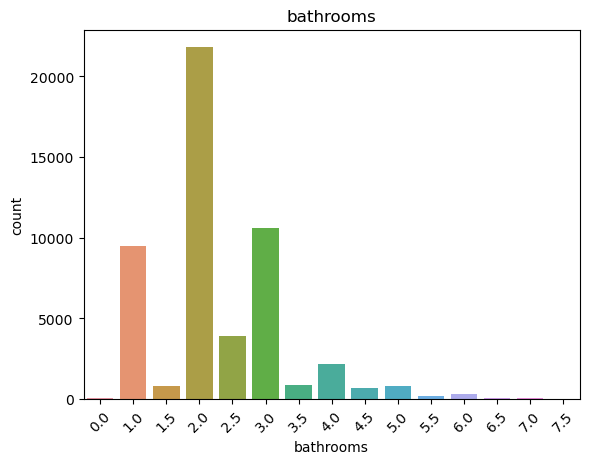

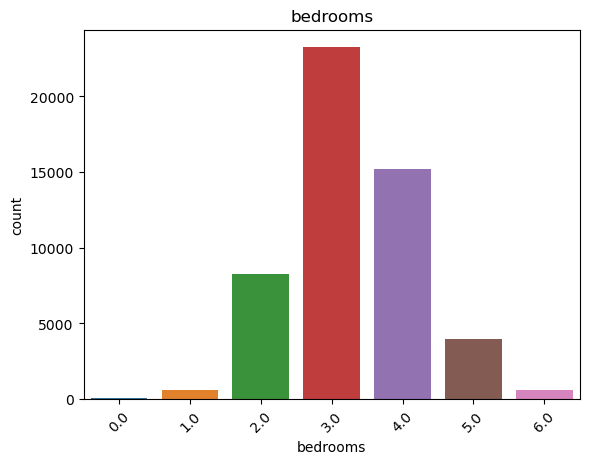

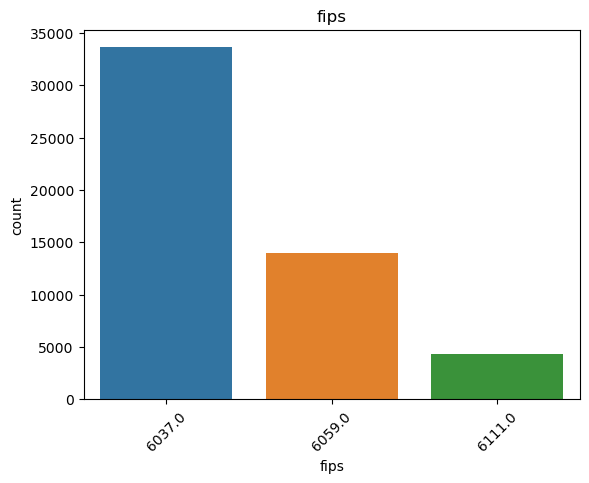

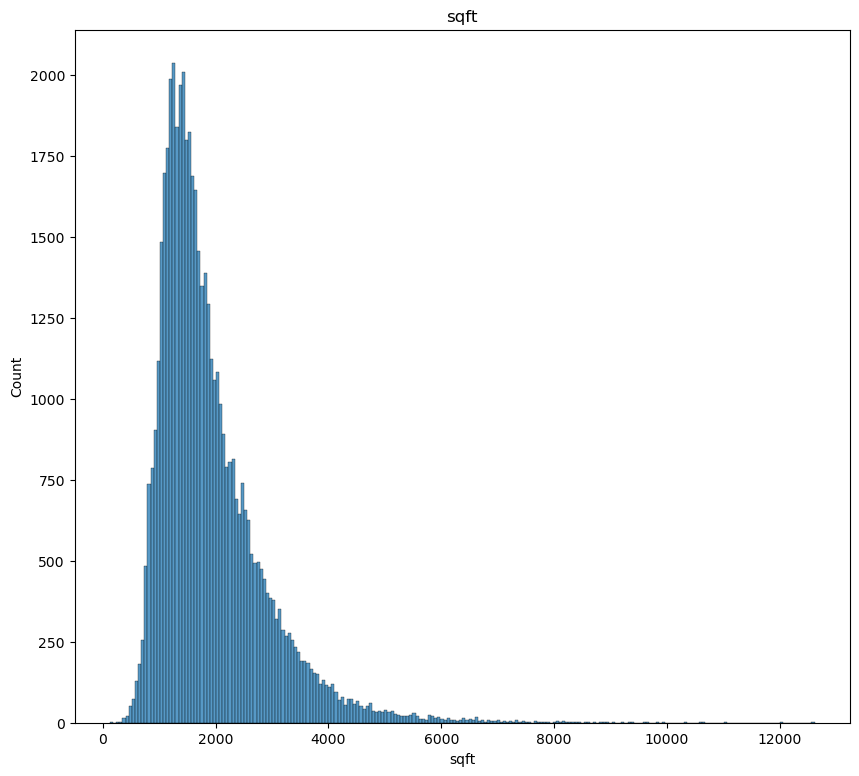

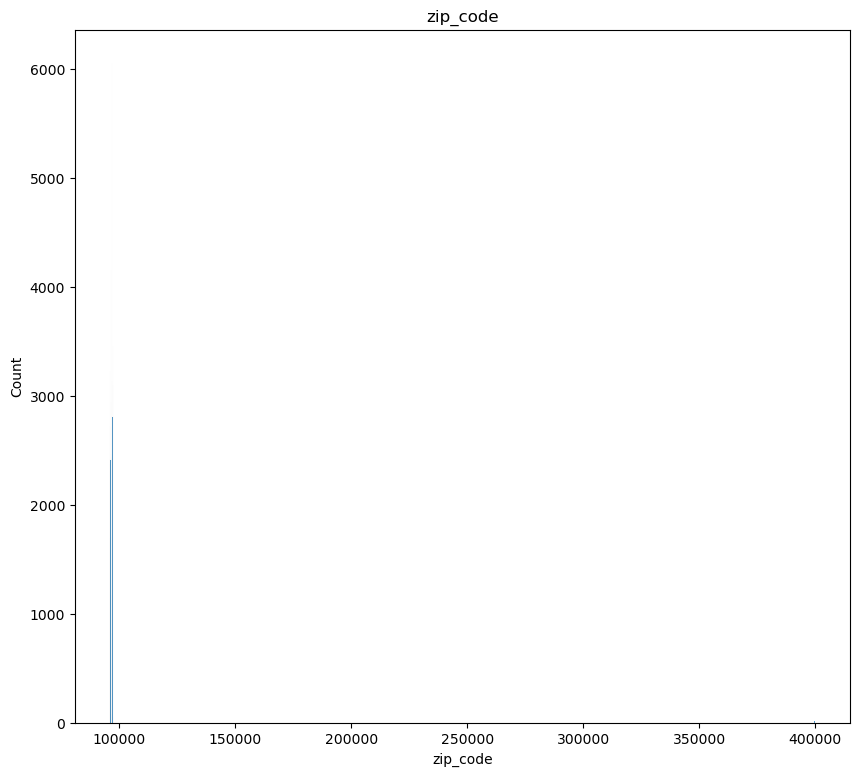

In [52]:
# create the list to store returned values
categorical_col = []
continuous_col = []

# create a for loop that iterates through each value in train dataframe
for col in pred_df:
    # appends the column name to categoriacl_col if there are less than 10 categories in column
    if pred_df[col].nunique() < 36:
        categorical_col.append(col)
    else: 
    # appends the column name to continuous_list if there are less than 10 categories in column
        continuous_col.append(col)

# create a for loop that iterates through each value in categorical_col
for feature in categorical_col:
    if feature != 'tax_value':
        # plots the points using the items(features) in the cat_list
        sns.countplot(x=feature, data=pred_df)
        plt.title(feature)
        plt.xticks(rotation=45)

    plt.show()
    
    
for feature in continuous_col:
    if feature != 'tax_value':
        plt.figure(figsize=(10, 9))
        sns.histplot(x=feature, data=pred_df)
        plt.title(feature)
        plt.show()

# Bivaraite Data

In [53]:
def plot_variable_pairs(df):
    sns.set(style="ticks")
    sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
    plt.show()

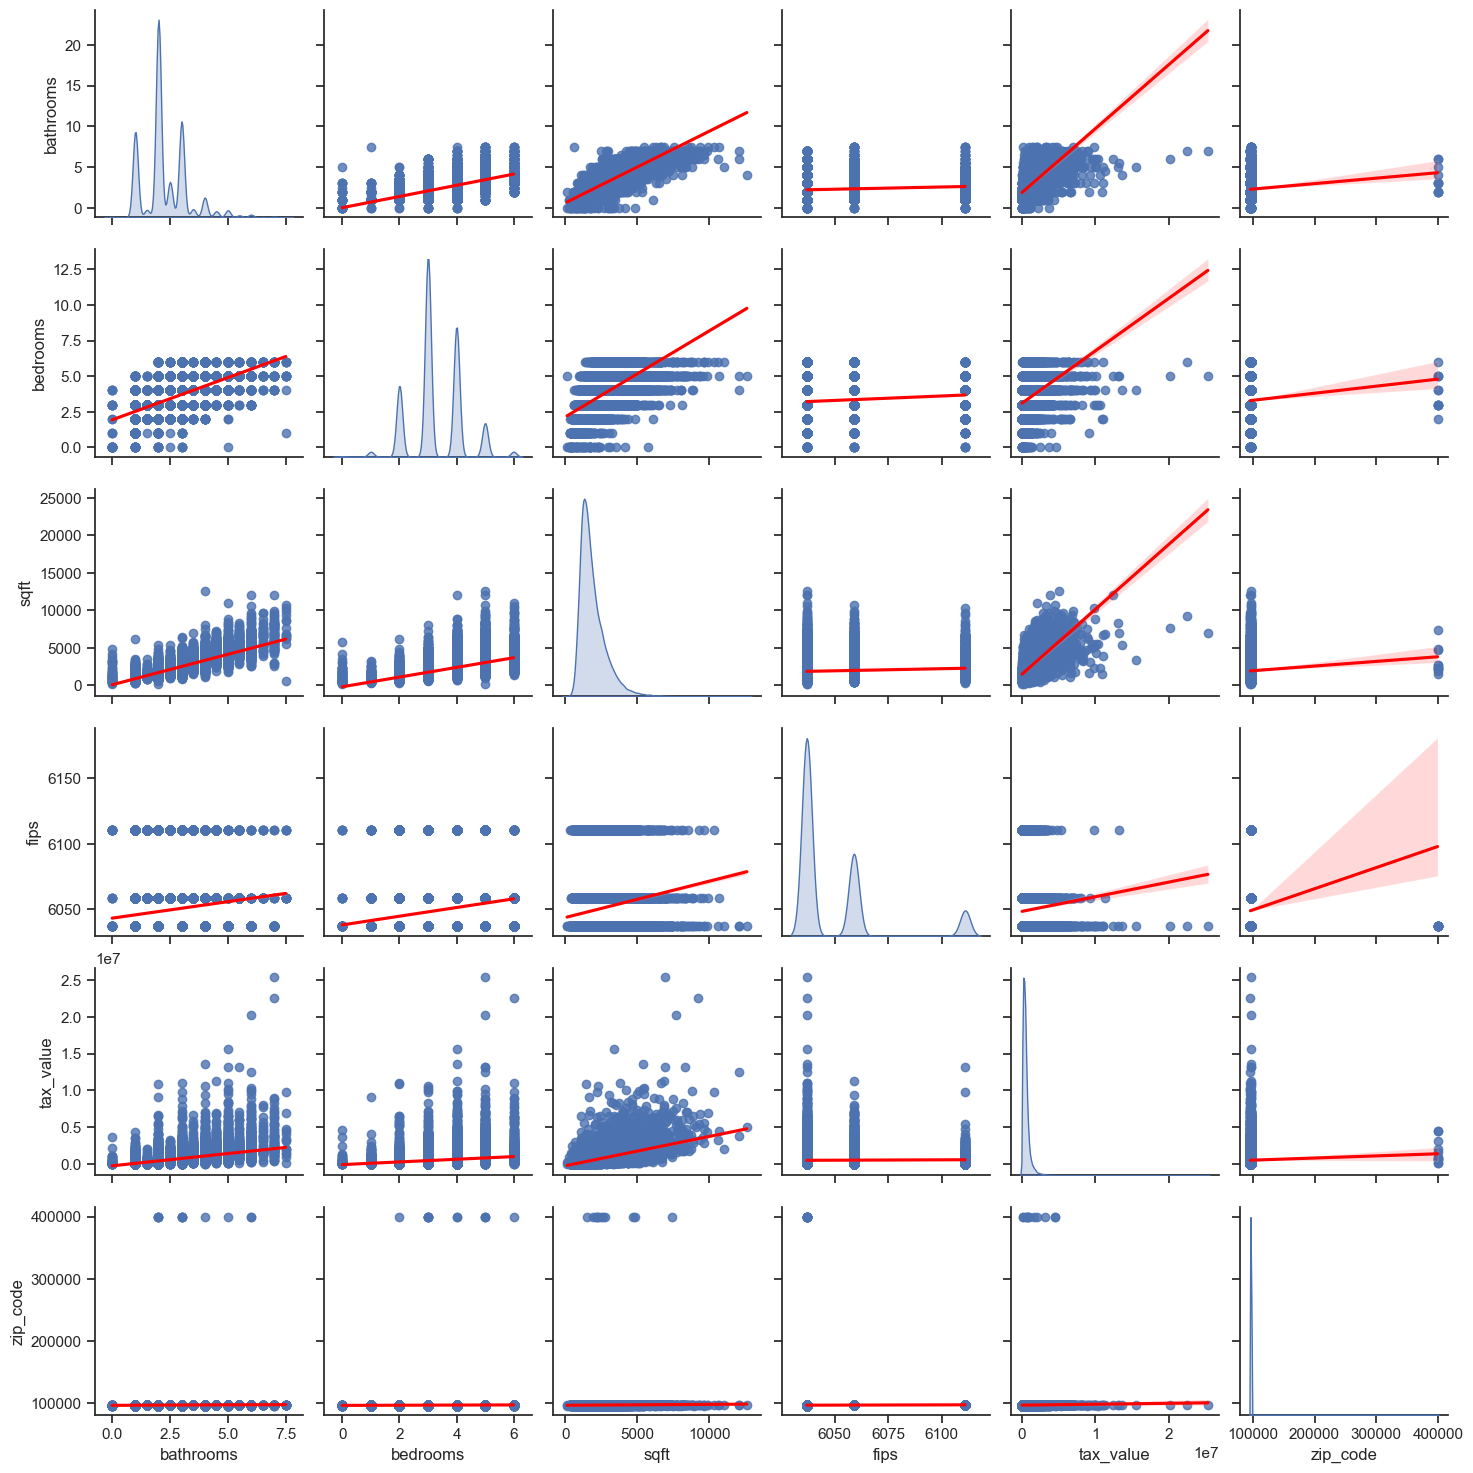

In [54]:
plot_variable_pairs(pred_df)

In [55]:
def relplot_var(df):
    
    plt.figure(figsize=(20, 9))
    sns.set(style="ticks")
    sns.relplot(df, x='sqft', y='tax_value', kind='scatter')
    plt.show()


# sns.relplot(x, y, data, kind=scatter)

<Figure size 2000x900 with 0 Axes>

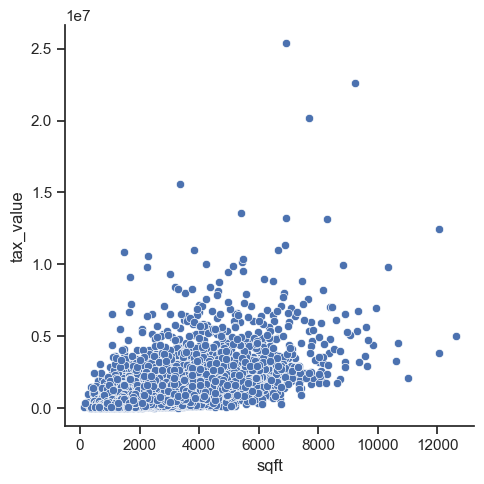

In [56]:
relplot_var(pred_df)

<Figure size 2000x900 with 0 Axes>

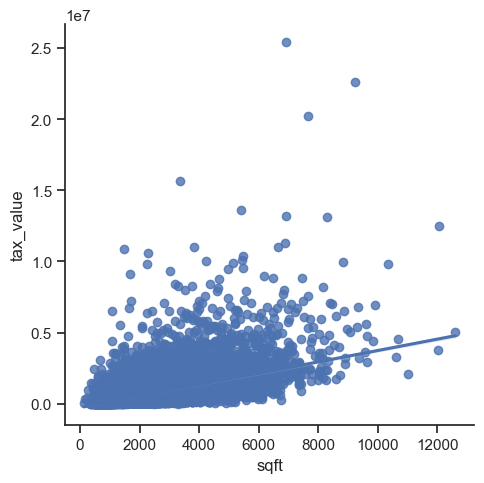

In [57]:
plt.figure(figsize=(20, 9))
sns.set(style="ticks")
sns.lmplot(pred_df, x='sqft', y='tax_value')
plt.show()


<Axes: >

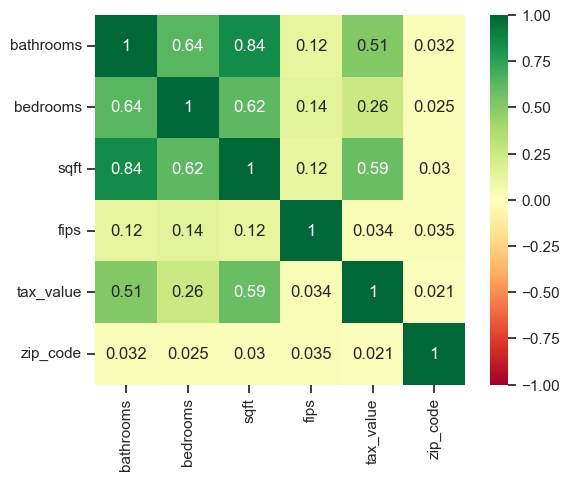

In [58]:
sns.heatmap(pred_df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, square=True)

# Why do some properties have a much higher value than others when they are located so close to each other?

In [59]:
train, validate, test = wrangle.split_clean_zillow()

In [60]:
pred_df.groupby('zip_code').tax_value.median()

zip_code
95982.0     191402.0
95983.0     190816.5
95984.0     183230.5
95985.0     694102.0
95986.0     808535.0
              ...   
97329.0     265257.0
97330.0     190848.0
97331.0     194000.0
97344.0     107478.0
399675.0    838897.5
Name: tax_value, Length: 380, dtype: float64

In [61]:
pred_df.groupby('fips').tax_value.median()

fips
6037.0    322869.0
6059.0    471754.5
6111.0    441510.5
Name: tax_value, dtype: float64

In [62]:
column_list = pred_df.columns.tolist()

## Tax Value mean by County:

### Orange

In [63]:
(pd.DataFrame(pred_df[pred_df['fips'] == 6059.0]).tax_value.mean())

596966.5076537911

###  Los Angeles

In [64]:
(pd.DataFrame(pred_df[pred_df['fips'] == 6037.0]).tax_value.mean())

482987.1360526003

### Ventura

In [65]:
(pd.DataFrame(pred_df[pred_df['fips'] == 6111.0]).tax_value.mean())

512613.5425482981

---

# Ventura County Zip Codes

In [66]:
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

### Number of different zip codes in Ventura

In [67]:
ventura = pd.DataFrame(pred_df[pred_df['fips'] == 6111.0].groupby('zip_code').mean().sort_values(by='tax_value'))
len(ventura)

27

---

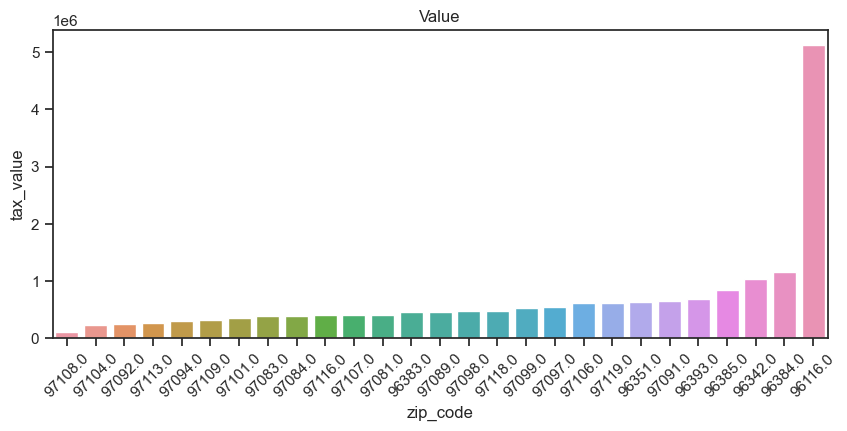

In [68]:
plt.figure(figsize=(10, 4))
sns.barplot(x=ventura.index, y='tax_value', data=ventura, order=ventura.index)
plt.title('Value')
plt.xticks(rotation=45)
plt.show()

### Zip codes where Property over 1 Million in Ventura County

In [69]:
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

In [70]:
ventura_top = pd.DataFrame(train[train['fips'] == 6111.0].groupby('zip_code').median()\
                          .sort_values(by='tax_value', ascending=False))
ventura_over_1M = ventura_top[ventura_top['tax_value']>1.0e6]
ventura_over_1M

,bathrooms,bedrooms,sqft,fips,tax_value
zip_code,,,,,
96116.0,3.50,4.0,3122.0,6111.0,2071805.0
96342.0,4.25,5.0,3784.5,6111.0,1129988.0


# Los Angeles County Zip Codes

### Number of different zip codes in Los Angeles County

In [71]:
los_angeles = pd.DataFrame(train[train['fips'] == 6037.0].groupby('zip_code').mean().sort_values(by='tax_value'))
len(los_angeles)

270

---

In [72]:
# Calculating list
list_length = len(los_angeles)
part_size = list_length // 10
los_angeles1 = los_angeles.iloc[:part_size]
los_angeles2 = los_angeles.iloc[part_size:2 * part_size]
los_angeles3 = los_angeles.iloc[2 * part_size:3 * part_size]
los_angeles4 = los_angeles.iloc[3 * part_size:4 * part_size]
los_angeles5 = los_angeles.iloc[4 * part_size:5 * part_size]
los_angeles6 = los_angeles.iloc[5 * part_size:6 * part_size]
los_angeles7 = los_angeles.iloc[6 * part_size:7 * part_size]
los_angeles8 = los_angeles.iloc[7 * part_size:8 * part_size]
los_angeles9 = los_angeles.iloc[8 * part_size:9 * part_size]
los_angeles10 = los_angeles.iloc[9 * part_size:10 * part_size]

In [73]:
# Create a list of counties to put on ghraph 
la_county_zip_list =[los_angeles1,
                    los_angeles2,
                    los_angeles3 ,
                    los_angeles4,
                    los_angeles5 ,
                    los_angeles6,
                    los_angeles7,
                    los_angeles8 ,
                    los_angeles9,
                    los_angeles10]

### Graphing the average Property Value for each Zip Code

In [74]:
len(df)

52442

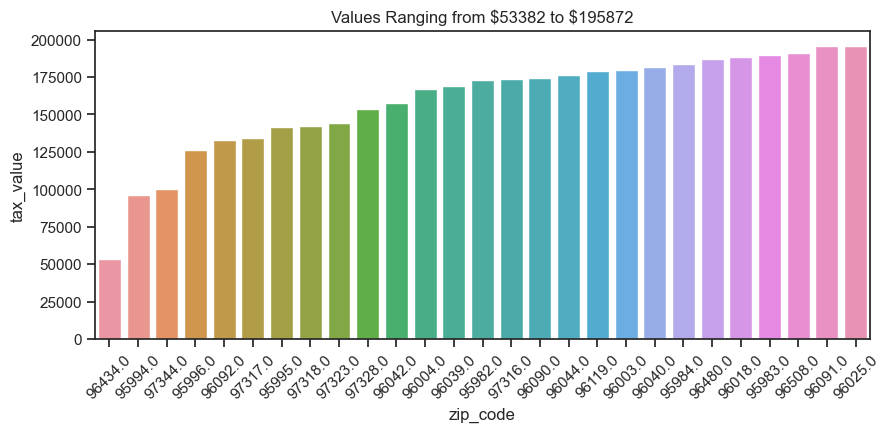

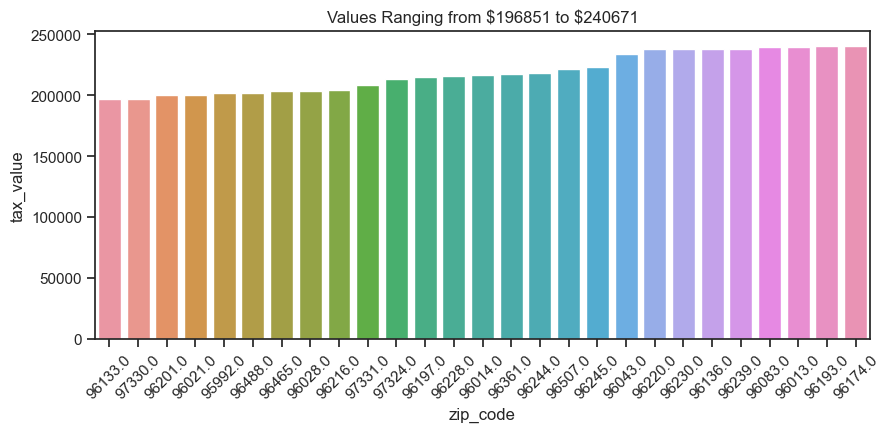

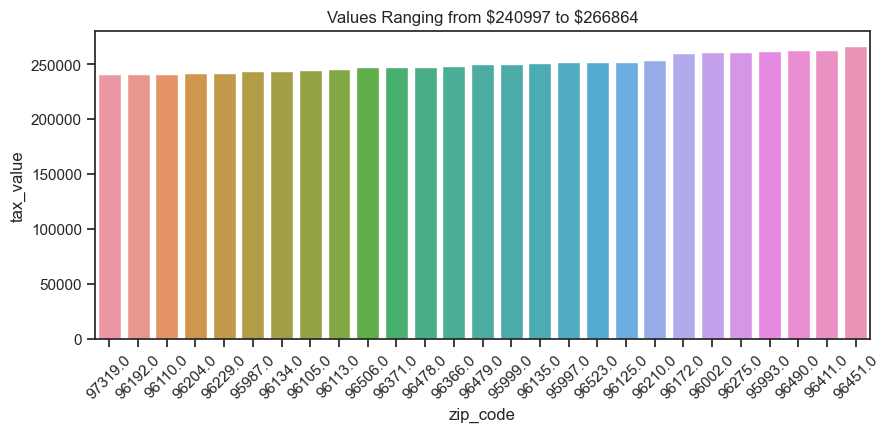

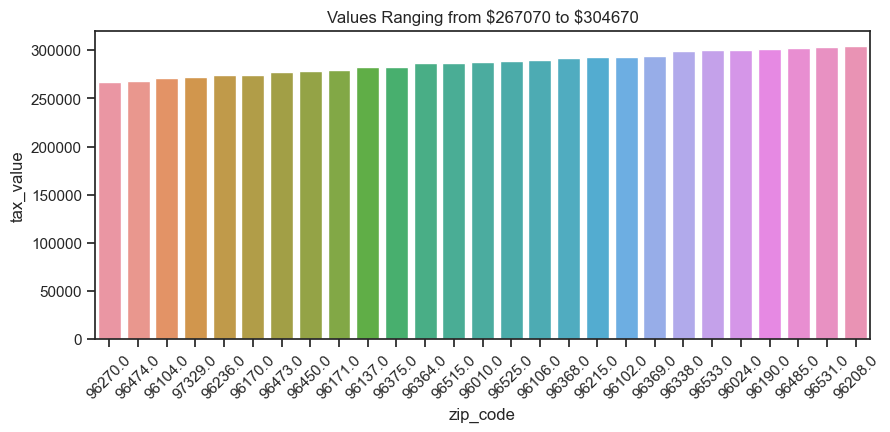

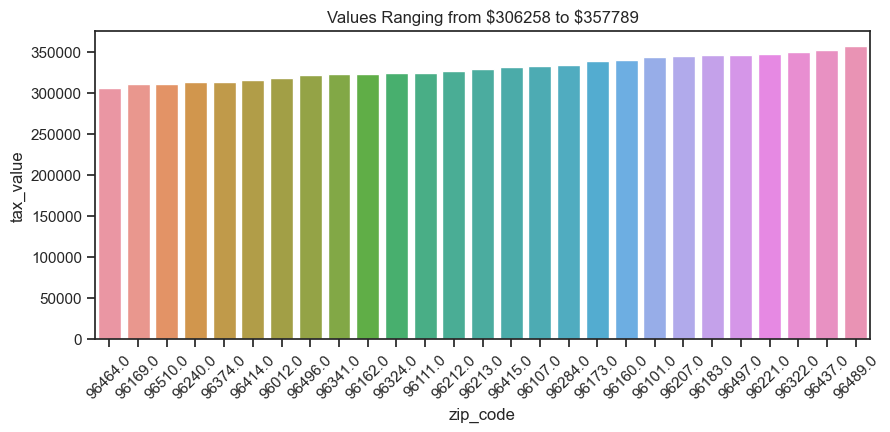

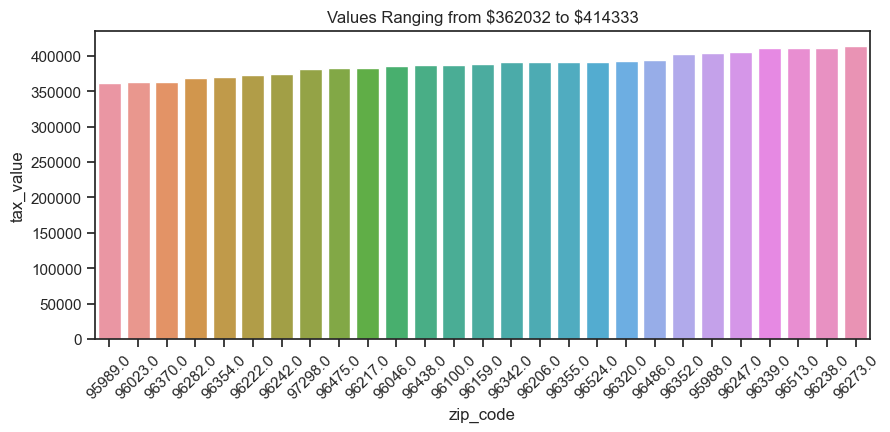

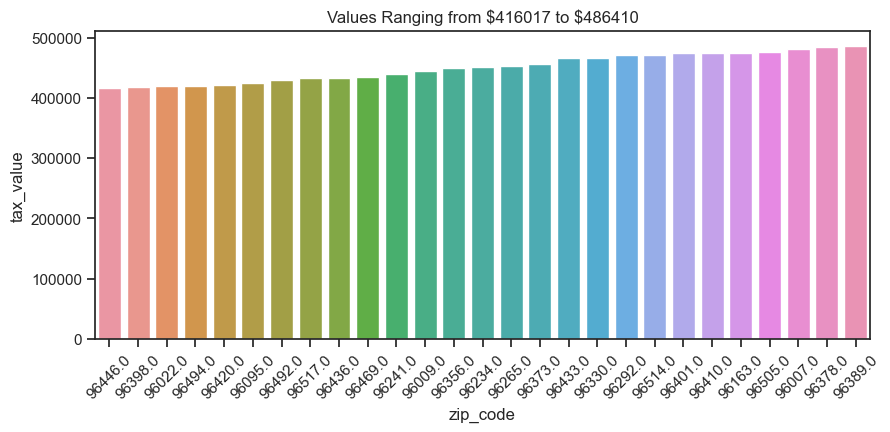

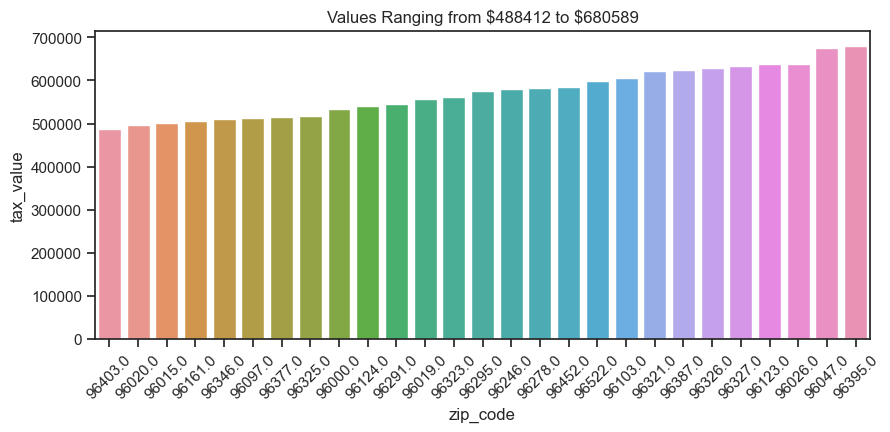

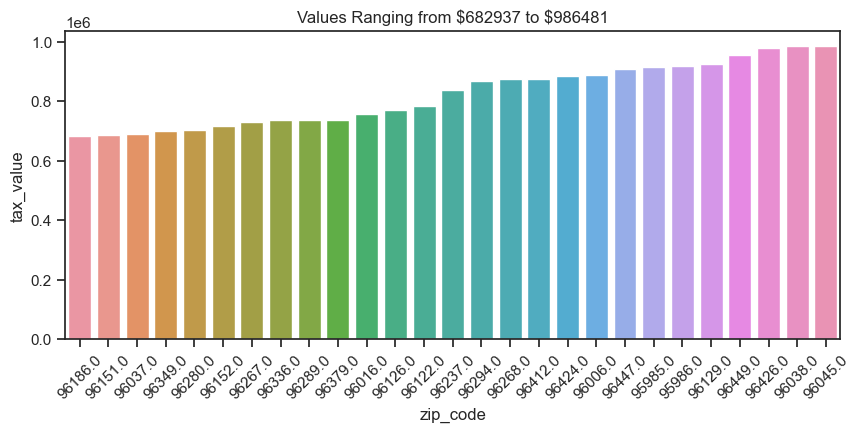

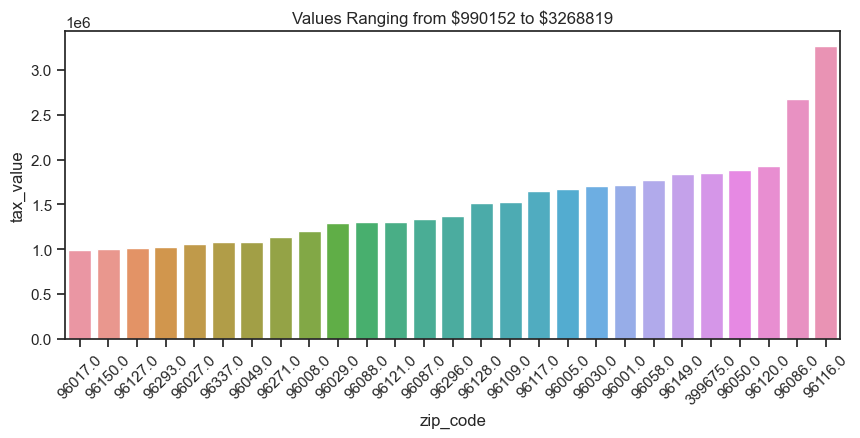

In [75]:

for df in la_county_zip_list:

    plt.figure(figsize=(10, 4))
    sns.barplot(x=df.index, y='tax_value', data=df, order=df.index)
    plt.title(f'Values Ranging from \${round(df.tax_value.iloc[0])} to \${round(df.tax_value.iloc[len(df)-1])}')
    plt.xticks(rotation=45)
    plt.show()

### Zip codes where Property Averages over 1 Million in Ventura County

In [76]:
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

In [77]:
los_angeles_top = pd.DataFrame(train[train['fips'] == 6111.0].groupby('zip_code').mean()\
                          .sort_values(by='tax_value', ascending=False))
los_angeles_over_1M = los_angeles_top[los_angeles_top['tax_value']>1.0e6]
los_angeles_over_1M

,bathrooms,bedrooms,sqft,fips,tax_value
zip_code,,,,,
96116.0,3.833333,4.000000,3828.000000,6111.0,5.132625e+06
96384.0,3.274648,4.084507,3161.943662,6111.0,1.245699e+06
96342.0,4.093750,4.500000,3677.000000,6111.0,1.116790e+06


# Orange County Zip Codes

In [78]:
orange = pd.DataFrame(train[train['fips'] == 6059.0].groupby('zip_code').mean().sort_values(by='tax_value'))


list_length = len(orange)
part_size = list_length // 3
orange1 = orange.iloc[:part_size]
orange2 = orange.iloc[part_size:2 * part_size]
orange3 = orange.iloc[2 * part_size:]

In [79]:
# Create a list of counties to put on ghraph 
orange_county_zip_list =[orange1,
                     orange2,
                     orange3
                    ]

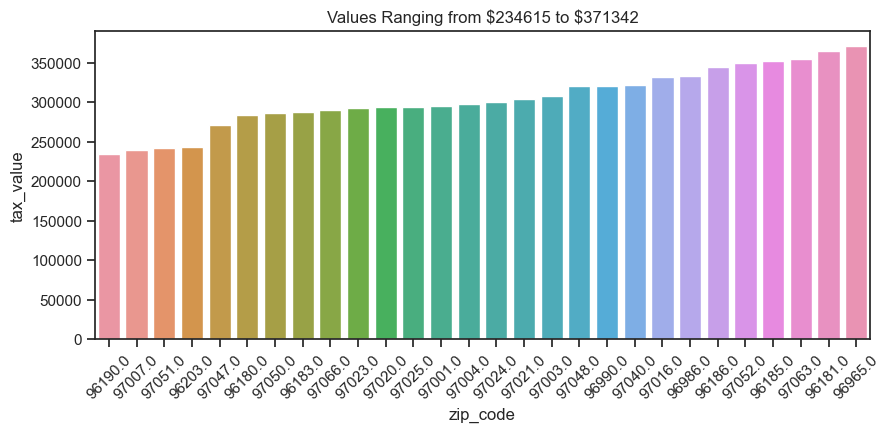

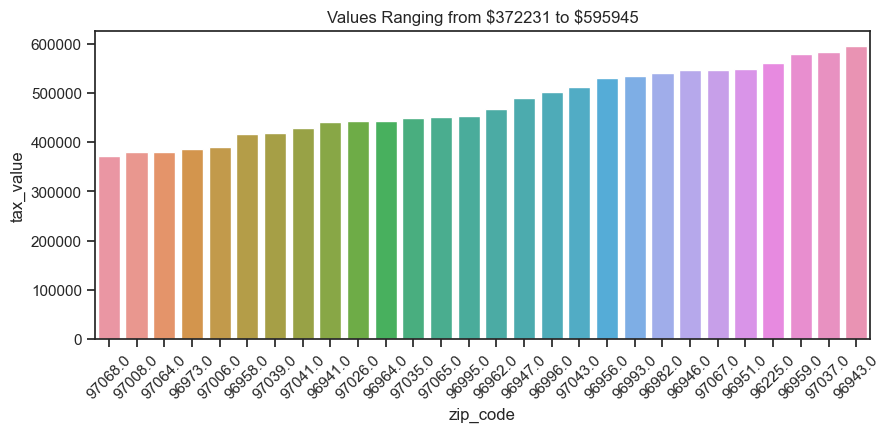

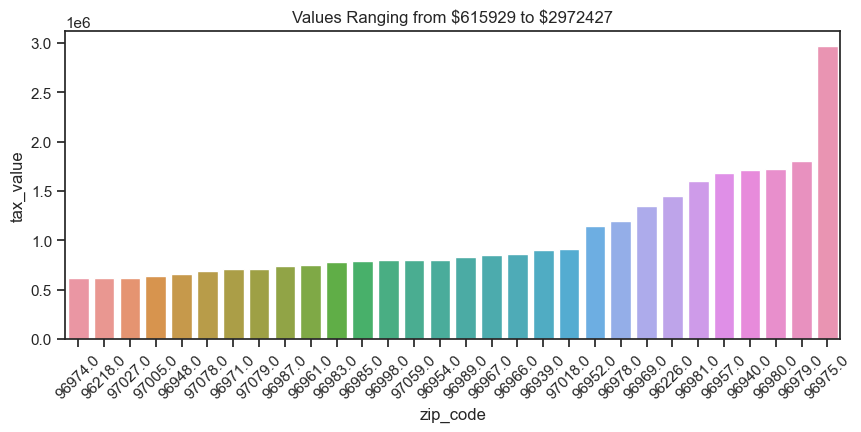

In [80]:
for df in orange_county_zip_list:
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=df.index, y='tax_value', data=df, order=df.index)
    plt.title(f'Values Ranging from \${round(df.tax_value.iloc[0])} to \${round(df.tax_value.iloc[len(df)-1])}')
    plt.xticks(rotation=45)
    plt.show()
    


### Zip codes where Property Averages over 1 Million in Orange County


In [81]:
value_mapping = {6037.0: 'Los Angeles', 6059.0: 'Orange', 6111.0: 'Ventura'}

In [82]:
orange_top = pd.DataFrame(train[train['fips'] == 6059.0].groupby('zip_code').mean()\
                          .sort_values(by='tax_value', ascending=False))
orange_over_1M = orange_top[orange_top['tax_value']>1.0e6]
orange_over_1M

,bathrooms,bedrooms,sqft,fips,tax_value
zip_code,,,,,
96975.0,4.431034,4.155172,4462.793103,6059.0,2.972427e+06
96979.0,3.151515,3.242424,2490.727273,6059.0,1.805736e+06
96980.0,3.055556,3.333333,2066.222222,6059.0,1.724964e+06
96940.0,3.753521,4.056338,3806.028169,6059.0,1.717193e+06
96957.0,2.909722,3.333333,2666.472222,6059.0,1.686078e+06
96981.0,3.026316,3.460526,2530.934211,6059.0,1.601109e+06
96226.0,1.375000,2.250000,1032.750000,6059.0,1.454026e+06
96969.0,2.372881,2.923729,2043.050847,6059.0,1.344309e+06
96978.0,3.039157,3.698795,2759.439759,6059.0,1.194331e+06


# What combination of Bedrooms and Bathrooms provide more Value

In [83]:
train, validate, test = wrangle.split_clean_zillow()

In [84]:
train.head()

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
30707,3.0,4.0,1965.0,6037.0,194803.0,97330.0
20167,1.5,3.0,1363.0,6059.0,338024.0,97063.0
24162,2.0,3.0,1262.0,6037.0,55863.0,96361.0
30921,2.0,3.0,1921.0,6037.0,700112.0,96387.0
49586,4.0,6.0,3174.0,6037.0,885972.0,96517.0


In [85]:
train.bedrooms.value_counts().index.to_list()

[3.0, 4.0, 2.0, 5.0, 1.0, 6.0, 0.0]

In [86]:
bedroom_num, bathroom_num = train.bedrooms.value_counts().index.to_list(), \
train.bathrooms.value_counts().index.to_list()

In [87]:
import itertools

# Initialize lists
list_1 = bedroom_num
list_2 = bathroom_num

# Generate unique combinations
unique_combinations = list(itertools.product(list_1, list_2))

print(unique_combinations)

[(3.0, 2.0), (3.0, 3.0), (3.0, 1.0), (3.0, 2.5), (3.0, 4.0), (3.0, 3.5), (3.0, 1.5), (3.0, 5.0), (3.0, 4.5), (3.0, 6.0), (3.0, 5.5), (3.0, 7.0), (3.0, 6.5), (3.0, 0.0), (3.0, 7.5), (4.0, 2.0), (4.0, 3.0), (4.0, 1.0), (4.0, 2.5), (4.0, 4.0), (4.0, 3.5), (4.0, 1.5), (4.0, 5.0), (4.0, 4.5), (4.0, 6.0), (4.0, 5.5), (4.0, 7.0), (4.0, 6.5), (4.0, 0.0), (4.0, 7.5), (2.0, 2.0), (2.0, 3.0), (2.0, 1.0), (2.0, 2.5), (2.0, 4.0), (2.0, 3.5), (2.0, 1.5), (2.0, 5.0), (2.0, 4.5), (2.0, 6.0), (2.0, 5.5), (2.0, 7.0), (2.0, 6.5), (2.0, 0.0), (2.0, 7.5), (5.0, 2.0), (5.0, 3.0), (5.0, 1.0), (5.0, 2.5), (5.0, 4.0), (5.0, 3.5), (5.0, 1.5), (5.0, 5.0), (5.0, 4.5), (5.0, 6.0), (5.0, 5.5), (5.0, 7.0), (5.0, 6.5), (5.0, 0.0), (5.0, 7.5), (1.0, 2.0), (1.0, 3.0), (1.0, 1.0), (1.0, 2.5), (1.0, 4.0), (1.0, 3.5), (1.0, 1.5), (1.0, 5.0), (1.0, 4.5), (1.0, 6.0), (1.0, 5.5), (1.0, 7.0), (1.0, 6.5), (1.0, 0.0), (1.0, 7.5), (6.0, 2.0), (6.0, 3.0), (6.0, 1.0), (6.0, 2.5), (6.0, 4.0), (6.0, 3.5), (6.0, 1.5), (6.0, 5.0), (6.

In [88]:
import itertools
from itertools import permutations
 
# initialize lists
list_1 = bedroom_num
list_2 = bathroom_num
 
unique_combinations = []
 
for i in range(len(list_1)):
    for j in range(len(list_2)):
        unique_combinations.append((list_1[i], list_2[j]))
 
print(unique_combinations)

[(3.0, 2.0), (3.0, 3.0), (3.0, 1.0), (3.0, 2.5), (3.0, 4.0), (3.0, 3.5), (3.0, 1.5), (3.0, 5.0), (3.0, 4.5), (3.0, 6.0), (3.0, 5.5), (3.0, 7.0), (3.0, 6.5), (3.0, 0.0), (3.0, 7.5), (4.0, 2.0), (4.0, 3.0), (4.0, 1.0), (4.0, 2.5), (4.0, 4.0), (4.0, 3.5), (4.0, 1.5), (4.0, 5.0), (4.0, 4.5), (4.0, 6.0), (4.0, 5.5), (4.0, 7.0), (4.0, 6.5), (4.0, 0.0), (4.0, 7.5), (2.0, 2.0), (2.0, 3.0), (2.0, 1.0), (2.0, 2.5), (2.0, 4.0), (2.0, 3.5), (2.0, 1.5), (2.0, 5.0), (2.0, 4.5), (2.0, 6.0), (2.0, 5.5), (2.0, 7.0), (2.0, 6.5), (2.0, 0.0), (2.0, 7.5), (5.0, 2.0), (5.0, 3.0), (5.0, 1.0), (5.0, 2.5), (5.0, 4.0), (5.0, 3.5), (5.0, 1.5), (5.0, 5.0), (5.0, 4.5), (5.0, 6.0), (5.0, 5.5), (5.0, 7.0), (5.0, 6.5), (5.0, 0.0), (5.0, 7.5), (1.0, 2.0), (1.0, 3.0), (1.0, 1.0), (1.0, 2.5), (1.0, 4.0), (1.0, 3.5), (1.0, 1.5), (1.0, 5.0), (1.0, 4.5), (1.0, 6.0), (1.0, 5.5), (1.0, 7.0), (1.0, 6.5), (1.0, 0.0), (1.0, 7.5), (6.0, 2.0), (6.0, 3.0), (6.0, 1.0), (6.0, 2.5), (6.0, 4.0), (6.0, 3.5), (6.0, 1.5), (6.0, 5.0), (6.

In [89]:
train[(train.bedrooms==3) & (train.bathrooms==2)].sort_values('tax_value', ascending=False)

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
39868,2.0,3.0,1631.0,6037.0,6700650.0,96116.0
28954,2.0,3.0,3267.0,6037.0,4195896.0,96086.0
1605,2.0,3.0,1486.0,6037.0,4080000.0,96120.0
21786,2.0,3.0,2325.0,6037.0,4061000.0,96149.0
17598,2.0,3.0,1942.0,6059.0,3414893.0,96957.0
...,...,...,...,...,...,...
34603,2.0,3.0,1403.0,6037.0,31835.0,96023.0
12531,2.0,3.0,984.0,6037.0,30390.0,96270.0
1241,2.0,3.0,1230.0,6037.0,29770.0,96046.0
28096,2.0,3.0,1589.0,6059.0,27918.0,97035.0


In [90]:
pd.set_option('display.max_rows', 1000)
max_values = pd.DataFrame(train.groupby(['bedrooms', 'bathrooms']).tax_value.max())

for x,y in unique_combinations:
    
    print('--------------------------------')
    print(f'Number of Bedrooms {x}')
    print(f'Number of Bathrooms {y}')
    df = train[(train.bedrooms==x) & (train.bathrooms==y)].sort_values('tax_value', ascending=False)   
    #print(f'Max Home Value for combination {df.tax_value.iloc[0]}')
    display(df.head())
    
    

--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
39868,2.0,3.0,1631.0,6037.0,6700650.0,96116.0
28954,2.0,3.0,3267.0,6037.0,4195896.0,96086.0
1605,2.0,3.0,1486.0,6037.0,4080000.0,96120.0
21786,2.0,3.0,2325.0,6037.0,4061000.0,96149.0
17598,2.0,3.0,1942.0,6059.0,3414893.0,96957.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
13399,3.0,3.0,2234.0,6037.0,9837579.0,96117.0
27642,3.0,3.0,1696.0,6037.0,7214000.0,96116.0
44217,3.0,3.0,3006.0,6037.0,6523866.0,96116.0
4890,3.0,3.0,2794.0,6059.0,5173428.0,96981.0
47257,3.0,3.0,2154.0,6037.0,3550000.0,96117.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
35458,1.0,3.0,1466.0,6037.0,2093967.0,96027.0
40262,1.0,3.0,1152.0,6037.0,1639000.0,96127.0
22968,1.0,3.0,1168.0,6037.0,1525607.0,96128.0
37537,1.0,3.0,1388.0,6037.0,1450000.0,96117.0
51780,1.0,3.0,1369.0,6059.0,1437000.0,96981.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
5545,2.5,3.0,3070.0,6059.0,3106828.0,96969.0
33537,2.5,3.0,2034.0,6059.0,2263546.0,96969.0
39001,2.5,3.0,2644.0,6059.0,2226399.0,96978.0
31760,2.5,3.0,2018.0,6059.0,2035000.0,96979.0
47637,2.5,3.0,2317.0,6059.0,2030500.0,96978.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
26273,4.0,3.0,2832.0,6037.0,7073604.0,96109.0
22689,4.0,3.0,3184.0,6037.0,5798993.0,96116.0
22025,4.0,3.0,3090.0,6037.0,4932794.0,96030.0
29854,4.0,3.0,4042.0,6037.0,4401021.0,96120.0
48189,4.0,3.0,2860.0,6037.0,4220817.0,96120.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
21219,3.5,3.0,4511.0,6059.0,5422228.0,96957.0
24908,3.5,3.0,4373.0,6059.0,5279300.0,96957.0
20111,3.5,3.0,3557.0,6059.0,3411963.0,96975.0
20354,3.5,3.0,3494.0,6059.0,3089000.0,96969.0
43379,3.5,3.0,5051.0,6111.0,2996000.0,96384.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
36864,1.5,3.0,1530.0,6059.0,1615433.0,96969.0
46267,1.5,3.0,1891.0,6059.0,1270326.0,96969.0
404,1.5,3.0,2287.0,6111.0,983755.0,97089.0
31364,1.5,3.0,1329.0,6111.0,959000.0,97099.0
806,1.5,3.0,1389.0,6111.0,824576.0,97081.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
19272,5.0,3.0,4761.0,6037.0,5634637.0,96447.0
31955,5.0,3.0,5904.0,6037.0,4203662.0,96116.0
14942,5.0,3.0,4963.0,6037.0,3230000.0,96050.0
17307,5.0,3.0,3323.0,6037.0,2417577.0,96005.0
50648,5.0,3.0,6416.0,6037.0,1933183.0,96349.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
9955,4.5,3.0,4919.0,6059.0,4551031.0,96975.0
21690,4.5,3.0,4995.0,6059.0,3328754.0,96981.0
43678,4.5,3.0,3923.0,6059.0,3003050.0,96978.0
9554,4.5,3.0,3033.0,6059.0,2937118.0,96981.0
51341,4.5,3.0,3156.0,6059.0,2642301.0,96981.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
51837,6.0,3.0,5489.0,6037.0,10355345.0,96005.0
52124,6.0,3.0,4230.0,6037.0,10050974.0,96086.0
35483,6.0,3.0,4736.0,6037.0,5038068.0,96121.0
49971,6.0,3.0,4892.0,6037.0,3984381.0,96058.0
29874,6.0,3.0,4895.0,6037.0,3437956.0,95986.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
20774,5.5,3.0,4810.0,6059.0,3271228.0,96967.0
38362,5.5,3.0,5531.0,6059.0,2700000.0,96987.0
21276,5.5,3.0,4361.0,6111.0,1562700.0,97118.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
7854,0.0,3.0,3200.0,6111.0,1108809.0,97081.0
15077,0.0,3.0,3707.0,6111.0,556194.0,97089.0
36145,0.0,3.0,1760.0,6111.0,80303.0,97113.0
10970,0.0,3.0,1342.0,6111.0,55283.0,97084.0


--------------------------------
Number of Bedrooms 3.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
38334,2.0,4.0,1602.0,6037.0,4746293.0,96088.0
6938,2.0,4.0,2243.0,6037.0,2938664.0,96120.0
12713,2.0,4.0,1674.0,6037.0,2692389.0,96017.0
50926,2.0,4.0,2545.0,6037.0,2657000.0,96117.0
48714,2.0,4.0,1868.0,6037.0,2610000.0,96120.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
29829,3.0,4.0,2959.0,6037.0,5071173.0,96116.0
32768,3.0,4.0,2301.0,6037.0,3755409.0,96426.0
19846,3.0,4.0,2835.0,6037.0,3713639.0,96008.0
41663,3.0,4.0,2467.0,6037.0,3624370.0,96116.0
24195,3.0,4.0,3949.0,6037.0,3612154.0,96005.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
46856,1.0,4.0,1829.0,6037.0,1357602.0,96280.0
47165,1.0,4.0,1800.0,6059.0,1297403.0,96969.0
1367,1.0,4.0,1400.0,6037.0,1294443.0,96027.0
12707,1.0,4.0,3344.0,6037.0,1064636.0,96327.0
19263,1.0,4.0,1426.0,6037.0,999685.0,96047.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
42411,2.5,4.0,2518.0,6059.0,2870000.0,96957.0
961,2.5,4.0,2724.0,6059.0,2299805.0,96981.0
16596,2.5,4.0,3548.0,6059.0,2238000.0,96989.0
20091,2.5,4.0,3450.0,6059.0,2235338.0,96967.0
11407,2.5,4.0,2730.0,6059.0,2235000.0,96957.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
48925,4.0,4.0,5395.0,6037.0,13600098.0,96116.0
24788,4.0,4.0,3023.0,6059.0,9323011.0,96969.0
22053,4.0,4.0,3936.0,6059.0,6878585.0,96969.0
34945,4.0,4.0,2570.0,6059.0,4961367.0,96979.0
17101,4.0,4.0,3325.0,6037.0,4771675.0,96086.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
11317,3.5,4.0,2708.0,6059.0,5000000.0,96969.0
34056,3.5,4.0,2511.0,6059.0,4312575.0,96981.0
29182,3.5,4.0,3016.0,6059.0,3585000.0,96979.0
5992,3.5,4.0,3649.0,6059.0,3060978.0,96969.0
6302,3.5,4.0,3876.0,6059.0,2614268.0,96967.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
12683,1.5,4.0,1546.0,6059.0,1655000.0,96969.0
22742,1.5,4.0,1237.0,6059.0,518000.0,97023.0
22030,1.5,4.0,1776.0,6111.0,483706.0,96383.0
41365,1.5,4.0,1320.0,6059.0,477167.0,96186.0
49313,1.5,4.0,1236.0,6059.0,477000.0,96180.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
40239,5.0,4.0,3366.0,6037.0,15618488.0,96116.0
43710,5.0,4.0,8829.0,6037.0,9935000.0,96030.0
15080,5.0,4.0,4960.0,6037.0,9467005.0,96086.0
10227,5.0,4.0,3195.0,6037.0,8385501.0,96030.0
8701,5.0,4.0,5497.0,6037.0,7309800.0,96086.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
32319,4.5,4.0,6888.0,6059.0,11317682.0,96969.0
10888,4.5,4.0,7081.0,6059.0,6989366.0,96975.0
8796,4.5,4.0,6282.0,6059.0,6827556.0,96975.0
486,4.5,4.0,3991.0,6059.0,6689970.0,96979.0
12344,4.5,4.0,6378.0,6059.0,4321429.0,96940.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
35683,6.0,4.0,5131.0,6037.0,9870514.0,96116.0
48347,6.0,4.0,4976.0,6037.0,7400000.0,96086.0
37688,6.0,4.0,8886.0,6059.0,6526956.0,96975.0
16972,6.0,4.0,4551.0,6037.0,4413913.0,96109.0
27194,6.0,4.0,4232.0,6037.0,4252598.0,96294.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
46299,5.5,4.0,3812.0,6059.0,6000000.0,96981.0
5283,5.5,4.0,5377.0,6059.0,5988752.0,96975.0
16744,5.5,4.0,4220.0,6059.0,3013405.0,96978.0
30164,5.5,4.0,4506.0,6059.0,2966395.0,96967.0
18678,5.5,4.0,6864.0,6111.0,2919184.0,96385.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
2789,7.0,4.0,12039.0,6037.0,3794515.0,96410.0
16798,7.0,4.0,4813.0,6037.0,1582066.0,96271.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
14819,6.5,4.0,6855.0,6059.0,8020475.0,96957.0
23525,6.5,4.0,3863.0,6059.0,3807187.0,96979.0
35503,6.5,4.0,5278.0,6059.0,3524509.0,96940.0
34717,6.5,4.0,6484.0,6059.0,1804250.0,97067.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
37030,0.0,4.0,3262.0,6111.0,656734.0,96385.0
20320,0.0,4.0,2941.0,6111.0,516003.0,97099.0
23978,0.0,4.0,2945.0,6111.0,167510.0,97089.0


--------------------------------
Number of Bedrooms 4.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
43547,7.5,4.0,6107.0,6059.0,1458896.0,96979.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
42247,2.0,2.0,1335.0,6037.0,5513247.0,96116.0
27917,2.0,2.0,2079.0,6037.0,5482350.0,96117.0
28112,2.0,2.0,2097.0,6037.0,5305202.0,96030.0
1595,2.0,2.0,1482.0,6037.0,3822146.0,96120.0
25950,2.0,2.0,1107.0,6037.0,3536800.0,96116.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
39587,3.0,2.0,2236.0,6037.0,6400000.0,96049.0
21415,3.0,2.0,2419.0,6037.0,5177672.0,96116.0
34233,3.0,2.0,2299.0,6037.0,2370608.0,96120.0
51142,3.0,2.0,2149.0,6037.0,2200510.0,96120.0
35638,3.0,2.0,2112.0,6037.0,2200000.0,96086.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
12657,1.0,2.0,1076.0,6037.0,4385487.0,96117.0
25348,1.0,2.0,1189.0,6037.0,3600000.0,96127.0
3105,1.0,2.0,995.0,6037.0,2883731.0,96120.0
3008,1.0,2.0,1071.0,6037.0,2676204.0,96149.0
6791,1.0,2.0,1244.0,6037.0,2641843.0,96017.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
47057,2.5,2.0,2273.0,6059.0,2400000.0,96979.0
2957,2.5,2.0,1446.0,6111.0,1269062.0,97106.0
4186,2.5,2.0,2597.0,6059.0,1186000.0,96966.0
47803,2.5,2.0,2476.0,6059.0,1170000.0,96966.0
4906,2.5,2.0,1500.0,6059.0,1120526.0,96969.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
21144,4.0,2.0,4120.0,6037.0,5822858.0,96086.0
39463,4.0,2.0,3898.0,6037.0,4166703.0,96050.0
48550,4.0,2.0,3274.0,6059.0,1299520.0,96987.0
20456,4.0,2.0,3020.0,6037.0,1224729.0,96029.0
8634,4.0,2.0,1728.0,6037.0,944924.0,96027.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
34941,3.5,2.0,2103.0,6059.0,1856000.0,96979.0
40810,3.5,2.0,3568.0,6059.0,1705620.0,96998.0
14865,3.5,2.0,2639.0,6059.0,1536184.0,96957.0
5743,3.5,2.0,2894.0,6059.0,1161608.0,96957.0
38159,3.5,2.0,3067.0,6059.0,1041447.0,96961.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
917,1.5,2.0,1075.0,6059.0,2071069.0,96980.0
48332,1.5,2.0,1118.0,6111.0,802536.0,97081.0
43880,1.5,2.0,1234.0,6059.0,664710.0,96987.0
43333,1.5,2.0,1410.0,6111.0,662000.0,97083.0
3129,1.5,2.0,970.0,6059.0,615545.0,96969.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
8658,5.0,2.0,3118.0,6037.0,2553879.0,96058.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
14279,0.0,2.0,598.0,6037.0,60884.0,97316.0


--------------------------------
Number of Bedrooms 2.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
13333,2.0,5.0,1596.0,6037.0,1449268.0,96117.0
34596,2.0,5.0,1838.0,6037.0,1444790.0,96152.0
8627,2.0,5.0,5315.0,6037.0,1411181.0,96469.0
27112,2.0,5.0,2935.0,6111.0,1352821.0,96385.0
41717,2.0,5.0,2734.0,6037.0,1194000.0,96278.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
4970,3.0,5.0,4665.0,6037.0,8765700.0,96149.0
40830,3.0,5.0,3981.0,6037.0,4839778.0,96086.0
605,3.0,5.0,6339.0,6037.0,3908712.0,96001.0
51273,3.0,5.0,4691.0,6037.0,2649362.0,96001.0
14077,3.0,5.0,4077.0,6037.0,2489898.0,96271.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
36450,1.0,5.0,1663.0,6037.0,951922.0,95985.0
48757,1.0,5.0,1472.0,6037.0,717618.0,96007.0
9070,1.0,5.0,2664.0,6037.0,636000.0,96000.0
51167,1.0,5.0,3196.0,6037.0,527930.0,96024.0
1414,1.0,5.0,2413.0,6059.0,500000.0,97020.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
32767,2.5,5.0,3383.0,6059.0,1114729.0,96985.0
40687,2.5,5.0,3338.0,6059.0,1112714.0,97027.0
27699,2.5,5.0,2481.0,6059.0,1086317.0,96967.0
34639,2.5,5.0,3226.0,6059.0,908000.0,97027.0
21069,2.5,5.0,3138.0,6059.0,903572.0,97005.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
10188,4.0,5.0,2913.0,6037.0,5359357.0,96030.0
24725,4.0,5.0,4160.0,6037.0,4744865.0,96116.0
5878,4.0,5.0,4883.0,6037.0,4343311.0,96121.0
27419,4.0,5.0,3936.0,6037.0,4143556.0,96117.0
25733,4.0,5.0,4828.0,6037.0,3401087.0,96294.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
38831,3.5,5.0,3908.0,6059.0,2595000.0,96978.0
17765,3.5,5.0,3320.0,6059.0,2230039.0,96975.0
37038,3.5,5.0,4466.0,6059.0,2106643.0,97005.0
3479,3.5,5.0,3165.0,6059.0,1841281.0,96978.0
39517,3.5,5.0,4248.0,6111.0,1407100.0,96351.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
12850,1.5,5.0,1872.0,6059.0,668476.0,97005.0
32142,1.5,5.0,1751.0,6059.0,635000.0,97001.0
34385,1.5,5.0,1810.0,6059.0,538082.0,96180.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
24905,5.0,5.0,5427.0,6037.0,10130485.0,96086.0
19555,5.0,5.0,4640.0,6037.0,8118591.0,96116.0
30265,5.0,5.0,7742.0,6037.0,5974080.0,96117.0
37931,5.0,5.0,6138.0,6037.0,5855031.0,96086.0
23405,5.0,5.0,5090.0,6037.0,4973709.0,96120.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
50106,4.5,5.0,4036.0,6059.0,5722661.0,96981.0
28494,4.5,5.0,5367.0,6059.0,4711682.0,96975.0
4377,4.5,5.0,6113.0,6059.0,4600000.0,96978.0
11088,4.5,5.0,3545.0,6059.0,4368990.0,96969.0
7323,4.5,5.0,3731.0,6059.0,3952896.0,96981.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
51850,6.0,5.0,7674.0,6037.0,20203475.0,96116.0
49045,6.0,5.0,12056.0,6037.0,12479401.0,96058.0
50215,6.0,5.0,5483.0,6037.0,9523337.0,96117.0
26927,6.0,5.0,6489.0,6037.0,8823765.0,96005.0
16761,6.0,5.0,8385.0,6059.0,7055987.0,96981.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
10879,5.5,5.0,6912.0,6111.0,13198250.0,96116.0
23608,5.5,5.0,7300.0,6059.0,6711476.0,96975.0
13995,5.5,5.0,4380.0,6059.0,5467622.0,96975.0
17741,5.5,5.0,6141.0,6059.0,4238857.0,96940.0
1580,5.5,5.0,7114.0,6059.0,4073264.0,96940.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
11222,7.0,5.0,6913.0,6037.0,25381250.0,96116.0
45545,7.0,5.0,7494.0,6059.0,7208275.0,96975.0
27174,7.0,5.0,8610.0,6037.0,6154034.0,96121.0
51016,7.0,5.0,7818.0,6037.0,5416482.0,96086.0
1442,7.0,5.0,9848.0,6037.0,4400000.0,96349.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
37012,6.5,5.0,6832.0,6059.0,7733372.0,96975.0
41749,6.5,5.0,6991.0,6059.0,5721297.0,96975.0
3349,6.5,5.0,7031.0,6059.0,3925848.0,96940.0
45,6.5,5.0,9586.0,6059.0,3624442.0,96987.0
21831,6.5,5.0,6390.0,6111.0,2755000.0,96385.0


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 5.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
8631,7.5,5.0,6587.0,6059.0,4803918.0,96978.0
27412,7.5,5.0,10671.0,6059.0,4543068.0,96940.0
18301,7.5,5.0,8531.0,6111.0,4112590.0,96384.0
33853,7.5,5.0,9382.0,6059.0,3203693.0,96940.0
15474,7.5,5.0,6620.0,6111.0,940060.0,96385.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
21544,2.0,1.0,1678.0,6037.0,9120827.0,96116.0
20129,2.0,1.0,738.0,6037.0,2080469.0,96127.0
34380,2.0,1.0,1795.0,6059.0,1974661.0,96957.0
37459,2.0,1.0,1812.0,6037.0,1622076.0,96117.0
24106,2.0,1.0,1618.0,6037.0,1196281.0,96050.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
210,3.0,1.0,1619.0,6037.0,1664376.0,96116.0
42040,3.0,1.0,2504.0,6037.0,1600000.0,96424.0
7349,3.0,1.0,1780.0,6059.0,1074884.0,96982.0
7423,3.0,1.0,1404.0,6037.0,988034.0,96058.0
16690,3.0,1.0,1461.0,6059.0,983757.0,96225.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
23051,1.0,1.0,459.0,6059.0,2444554.0,96226.0
46417,1.0,1.0,1210.0,6059.0,2060000.0,96969.0
1164,1.0,1.0,597.0,6037.0,1928975.0,96149.0
35460,1.0,1.0,1164.0,6037.0,1508340.0,96050.0
41548,1.0,1.0,384.0,6059.0,1486936.0,96981.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
1968,1.5,1.0,1232.0,6111.0,82209.0,97081.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
17375,0.0,1.0,993.0,6037.0,118738.0,97298.0
12046,0.0,1.0,480.0,6037.0,13198.0,97318.0


--------------------------------
Number of Bedrooms 1.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
36840,7.5,1.0,612.0,6111.0,96210.0,97116.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
27650,2.0,6.0,2794.0,6037.0,2111719.0,96027.0
49243,2.0,6.0,2634.0,6037.0,878190.0,95985.0
32293,2.0,6.0,2384.0,6037.0,502548.0,96208.0
17967,2.0,6.0,1874.0,6037.0,475137.0,95987.0
28928,2.0,6.0,1934.0,6037.0,470000.0,96197.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
43814,3.0,6.0,4608.0,6037.0,7896700.0,96086.0
43876,3.0,6.0,3298.0,6037.0,1905414.0,96120.0
31149,3.0,6.0,3828.0,6037.0,1747000.0,96426.0
37258,3.0,6.0,3485.0,6037.0,1460199.0,96101.0
47226,3.0,6.0,2187.0,6037.0,1154401.0,96026.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
17387,2.5,6.0,2913.0,6059.0,814779.0,96998.0
9761,2.5,6.0,2635.0,6059.0,457169.0,97078.0
29621,2.5,6.0,2628.0,6059.0,398342.0,97016.0
8726,2.5,6.0,2571.0,6059.0,366616.0,96958.0
33316,2.5,6.0,2878.0,6111.0,355253.0,97089.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
14596,4.0,6.0,3654.0,6037.0,3384223.0,96116.0
47948,4.0,6.0,2640.0,6037.0,3195555.0,96050.0
36895,4.0,6.0,3587.0,6037.0,2610112.0,96001.0
28674,4.0,6.0,7472.0,6037.0,2441696.0,96008.0
37035,4.0,6.0,4221.0,6059.0,2050358.0,96939.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
13359,3.5,6.0,4536.0,6111.0,2412793.0,97106.0
44830,3.5,6.0,3382.0,6059.0,1301000.0,96943.0
1291,3.5,6.0,4264.0,6111.0,1267857.0,96385.0
3768,3.5,6.0,2972.0,6059.0,1144258.0,96954.0
23316,3.5,6.0,4072.0,6059.0,770190.0,97027.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
13788,5.0,6.0,4112.0,6037.0,7106750.0,96050.0
26954,5.0,6.0,5206.0,6037.0,5670132.0,96058.0
226,5.0,6.0,6249.0,6037.0,3681324.0,96001.0
11960,5.0,6.0,4975.0,6037.0,2398898.0,96296.0
48384,5.0,6.0,4664.0,6037.0,2385836.0,96426.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
16,4.5,6.0,3870.0,6059.0,2040000.0,96957.0
33273,4.5,6.0,4278.0,6059.0,1904628.0,96975.0
11495,4.5,6.0,4690.0,6111.0,1553000.0,96385.0
42959,4.5,6.0,5674.0,6059.0,1488103.0,97059.0
38448,4.5,6.0,3981.0,6111.0,1363000.0,96342.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
41010,6.0,6.0,5626.0,6037.0,6315000.0,96086.0
14378,6.0,6.0,6528.0,6037.0,6062620.0,96109.0
16505,6.0,6.0,7430.0,6037.0,4535969.0,399675.0
15042,6.0,6.0,6037.0,6037.0,4010237.0,96271.0
46076,6.0,6.0,6630.0,6037.0,3502612.0,96379.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
8606,5.5,6.0,5823.0,6059.0,6072319.0,96969.0
31317,5.5,6.0,5534.0,6059.0,2830009.0,96981.0
50246,5.5,6.0,5175.0,6059.0,2481018.0,96978.0
35029,5.5,6.0,5510.0,6059.0,2453000.0,96989.0
27884,5.5,6.0,5517.0,6059.0,2370353.0,97079.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
30749,7.0,6.0,9242.0,6037.0,22589311.0,96086.0
5435,7.0,6.0,8165.0,6037.0,8223062.0,96086.0
7452,7.0,6.0,7219.0,6037.0,6420313.0,96293.0
5755,7.0,6.0,6661.0,6037.0,5500000.0,96030.0
16344,7.0,6.0,5984.0,6037.0,5275899.0,96120.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
30208,6.5,6.0,6084.0,6059.0,6396075.0,96966.0
48088,6.5,6.0,9660.0,6111.0,4732000.0,96385.0
30643,6.5,6.0,7769.0,6059.0,4336027.0,96940.0
3707,6.5,6.0,8892.0,6059.0,3194365.0,96987.0
31984,6.5,6.0,6553.0,6111.0,3076800.0,96385.0


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 6.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
42219,7.5,6.0,10345.0,6111.0,9837578.0,96384.0
39824,7.5,6.0,9923.0,6059.0,6949815.0,96940.0
20411,7.5,6.0,6630.0,6059.0,1935342.0,97027.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 2.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
8997,2.0,0.0,2350.0,6037.0,487000.0,96009.0
15174,2.0,0.0,1164.0,6037.0,330582.0,96368.0
41398,2.0,0.0,1740.0,6037.0,261088.0,96002.0
12073,2.0,0.0,1720.0,6037.0,260880.0,96009.0
45200,2.0,0.0,1690.0,6037.0,256330.0,96009.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 3.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
39110,3.0,0.0,2445.0,6111.0,802486.0,96351.0
18032,3.0,0.0,2135.0,6111.0,590875.0,97084.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 1.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
20862,1.0,0.0,716.0,6059.0,2446532.0,96979.0
34562,1.0,0.0,560.0,6059.0,1202385.0,96973.0
39656,1.0,0.0,240.0,6037.0,380000.0,96515.0
12189,1.0,0.0,420.0,6111.0,288484.0,97099.0
4675,1.0,0.0,480.0,6037.0,227272.0,96217.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 2.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 4.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 3.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 1.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 5.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
590,5.0,0.0,5782.0,6037.0,4626995.0,96120.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 4.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 6.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 5.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 7.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 6.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 0.0


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
22910,0.0,0.0,4184.0,6059.0,1145602.0,96989.0
2899,0.0,0.0,280.0,6037.0,963472.0,96267.0
17766,0.0,0.0,3087.0,6037.0,631299.0,95989.0
52163,0.0,0.0,2307.0,6037.0,499000.0,96100.0
20987,0.0,0.0,554.0,6037.0,440000.0,96008.0


--------------------------------
Number of Bedrooms 0.0
Number of Bathrooms 7.5


,bathrooms,bedrooms,sqft,fips,tax_value,zip_code


In [91]:
max_values.loc[1:1]

tax_value
bedrooms bathrooms           
1.0      0.0         118738.0
         1.0        2444554.0
         1.5          82209.0
         2.0        9120827.0
         3.0        1664376.0
         7.5          96210.0

In [92]:
max_values.loc[0:0].max()

tax_value    4626995.0
dtype: float64

In [93]:
train[(train.bedrooms==3) & (train.bathrooms==2)].sort_values('tax_value', ascending=False)

,bathrooms,bedrooms,sqft,fips,tax_value,zip_code
39868,2.0,3.0,1631.0,6037.0,6700650.0,96116.0
28954,2.0,3.0,3267.0,6037.0,4195896.0,96086.0
1605,2.0,3.0,1486.0,6037.0,4080000.0,96120.0
21786,2.0,3.0,2325.0,6037.0,4061000.0,96149.0
17598,2.0,3.0,1942.0,6059.0,3414893.0,96957.0
...,...,...,...,...,...,...
34603,2.0,3.0,1403.0,6037.0,31835.0,96023.0
12531,2.0,3.0,984.0,6037.0,30390.0,96270.0
1241,2.0,3.0,1230.0,6037.0,29770.0,96046.0
28096,2.0,3.0,1589.0,6059.0,27918.0,97035.0


In [94]:
pd.set_option('display.max_rows', 1000)
mean_values = pd.DataFrame(train.groupby(['bedrooms', 'bathrooms'])['tax_value'].mean()).sort_values('tax_value', ascending=False)#.sort_values('tax_value', ascending=False))

In [95]:
mean_values

tax_value
bedrooms bathrooms              
6.0      7.5        6.240912e+06
5.0      7.0        5.198819e+06
0.0      5.0        4.626995e+06
6.0      7.0        4.481607e+06
4.0      6.5        4.289105e+06
3.0      6.0        4.003667e+06
5.0      7.5        3.520666e+06
         6.5        3.393371e+06
         6.0        2.812566e+06
4.0      6.0        2.705398e+06
         7.0        2.688290e+06
2.0      5.0        2.553879e+06
3.0      5.5        2.511309e+06
4.0      5.5        2.383892e+06
6.0      6.0        2.356490e+06
         6.5        2.306877e+06
4.0      5.0        2.065521e+06
2.0      4.0        2.054301e+06
5.0      5.5        2.014066e+06
6.0      5.5        1.874743e+06
3.0      5.0        1.819433e+06
4.0      4.5        1.646255e+06
3.0      4.5        1.584830e+06
5.0      5.0        1.522222e+06
4.0      7.5        1.458896e+06
3.0      4.0        1.325998e+06
6.0      5.0        1.320375e+06
5.0      4.5        1.308778e+06
3.0      3.5        1.230795e+06
2.0      3.5        1.184950e+06
6.0      3.5        1.152026e+06
4.0      4.0        1.109677e+06
6.0      4.5        1.091439e+06
1.0      3.0        1.069822e+06
4.0      3.5        9.814092e+05
5.0      4.0        9.627204e+05
         3.5        8.469986e+05
6.0      4.0        7.705524e+05
2.0      3.0        7.553437e+05
1.0      2.0        7.363682e+05
0.0      3.0        6.966805e+05
3.0      3.0        6.273366e+05
5.0      1.5        6.138527e+05
6.0      3.0        6.131629e+05
4.0      3.0        5.722482e+05
5.0      3.0        5.705450e+05
3.0      2.5        5.459276e+05
4.0      2.5        5.413410e+05
2.0      2.5        4.599121e+05
5.0      2.5        4.553700e+05
3.0      0.0        4.501472e+05
4.0      0.0        4.467490e+05
6.0      2.5        4.250245e+05
2.0      2.0        4.189323e+05
0.0      1.0        4.130149e+05
5.0      2.0        3.868317e+05
6.0      2.0        3.820660e+05
3.0      2.0        3.636754e+05
4.0      2.0        3.500177e+05
5.0      1.0        3.288513e+05
3.0      1.5        3.254656e+05
0.0      2.0        3.085945e+05
4.0      1.0        3.018811e+05
         1.5        3.016405e+05
0.0      0.0        2.983996e+05
2.0      1.5        2.909041e+05
         1.0        2.903291e+05
1.0      1.0        2.861285e+05
3.0      1.0        2.649718e+05
1.0      7.5        9.621000e+04
         1.5        8.220900e+04
         0.0        6.596800e+04
2.0      0.0        6.088400e+04

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


# Resetting the indices
df_reset = mean_values_over_1M.reset_index()

# Combining the indices into a single column
df_reset['Combined'] = mean_values_over_1M.index.to_list()

# Creating a bar plot
df_reset.plot(x='Combined', y='tax_value', kind='bar')

# Display the plot
plt.show()


NameError: name 'mean_values_over_1M' is not defined

In [ ]:
df_reset

In [ ]:
plt.figure(figsize=(16, 4))
sns.barplot(x=df_reset.Combined, y='tax_value', data=df_reset)
#plt.title(f'Values Ranging from \${round(df.tax_value.iloc[0])} to \${round(df.tax_value.iloc[len(df)-1])}')
plt.xticks(rotation=90)
plt.show()

In [ ]:
mean_values_over_1M = mean_values[mean_values['tax_value']>1e6]

In [ ]:
mean_values_over_1M.index.to_list()

In [ ]:
x_list = []
y_list = []

for x,y in mean_values_over_1M.index.to_list():
    x_list.append(x)
    y_list.append(y)
    

# Top Bedroom Numbers quantities with over 1M Value

In [ ]:
x_list = pd.DataFrame(x_list)
pd.DataFrame(x_list.value_counts(), columns=['count'])

# Top Bathroom Numbers quantities with over 1M Value

In [ ]:
y_list = pd.DataFrame(y_list)
y_list.value_counts()

## * Is having 1 bathroom worse for property value than having 2 bedrooms?


In [ ]:
bed_2_train = train[train['bedrooms']==1]
bed_1_train = train[train['bedrooms']==2]

In [ ]:
len(bed_1_train)

In [ ]:
len(bed_2_train)

In [ ]:
bed_2_train.head()

In [ ]:

# Create subplots with 1 row and 2 columns and assign axes to variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot DataFrame 1 in ax1
sns.scatterplot(data=bed_2_train, x='sqft', y='tax_value', ax=ax1)
ax1.set_title('Two Bedrooms')

meanline2 = bed_2_train['tax_value'].mean()
ax1.axhline(meanline2, color='red', linestyle='--', label='Mean')

# Plot DataFrame 2 in ax2
sns.scatterplot(data=bed_1_train, x='sqft', y='tax_value', ax=ax2)
ax2.set_title('One Bedroom')

meanline1 = bed_1_train['tax_value'].mean()
ax2.axhline(meanline1, color='red', linestyle='--', label='Mean')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Average for One Bedroom

In [ ]:
round(meanline1)

# Average for Two Bedroom

In [ ]:
round(meanline2)

In [ ]:
sns.relplot(train, x='sqft', y='tax_value', col='bedrooms', hue='fips')

# Split the Data for Model Testing

In [ ]:
from wrangle import wrangle_zillow

### Splitting the Data

In [ ]:
train, validate, test = wrangle.split_clean_zillow()

In [97]:
# verifying for nulls
train.isnull().value_counts()

bathrooms  bedrooms  sqft   fips   tax_value  zip_code
False      False     False  False  False      False       31164
dtype: int64

In [ ]:
X_train, y_train = train.drop(columns='tax_value'), pd.DataFrame(train.tax_value)
X_validate, y_validate = validate.drop(columns='tax_value'), pd.DataFrame(validate.tax_value)
X_test, y_test = test.drop(columns='tax_value'), pd.DataFrame(test.tax_value)

In [ ]:
# checking y_train
y_train

In [ ]:
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

In [ ]:
# create baseline accuracy
baseline = y_train.tax_value.mean()
y_train['baseline'] = baseline

In [ ]:
# create baseline accuracy
baseline = y_validate.tax_value.mean()
y_validate['baseline'] = baseline

In [ ]:
# Calculate the RMSE for the baseline model
rmse_train_mu = mean_squared_error(y_train.tax_value, y_train.baseline) ** 0.5
rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.baseline) ** 0.5
# Initialize a dataframe to store the evaluation metrics and add the baseline RMSE
results_df = pd.DataFrame(data=[{
    'model': 'Mean Baseline',
    'rmse_train': rmse_train_mu,
    'rmse_validate': rmse_validate_mu,
    'r_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline),
    'model_difference': abs(rmse_validate_mu - rmse_train_mu)
}])

display(results_df)

In [ ]:
#TRY AN OLS, LASSOLARS, TWEEDIE, POLYNOMIAL, AND GLM MODEL ON YOUR PREDICTORS AND TARGET, 
#APPEND THE RESULTS TO A DATAFRAME, THEN COMPARE MODELS

#OLS
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()


#1. FIT THE THING: fit the model to training data
OLSmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5


# appends results

results_df = results_df.append({
        'model': 'OLSmodel',
        'rmse_train': rmse_train,
        'rmse_validate': rmse_validate,
        'r_validate': explained_variance_score(y_validate.tax_value, y_validate.value_pred_ols),
        'model_difference': abs(rmse_validate - rmse_train)
    }, ignore_index=True)



print(f'''RMSE for OLS
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')


display(results_df)

In [ ]:
#LASSOLARS
# MAKE THE THING: create the model object
LASmodel = LassoLars(alpha=1.0)


#1. FIT THE THING: fit the model to training data
LASmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_las'] = LASmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_las) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_las'] = LASmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_las) ** .5


#results_df = results_df.append({
#        'model': 'LASmodel',
#        'rmse_train': rmse_train,
#        'rmse_validate': rmse_validate,
#        'r_validate': explained_variance_score(y_validate.tax_value, y_validate.value_pred_las),
#       'model_difference': abs(rmse_validate - rmse_train)
#    }, ignore_index=True)



print(f'''RMSE for LASmodel
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

#display(results_df)

In [ ]:
results_df = results_df.append({
        'model': 'LASmodel',
        'rmse_train': rmse_train,
        'rmse_validate': rmse_validate,
        'r_validate': explained_variance_score(y_validate.tax_value, y_validate.value_pred_las),
        'model_difference': abs(rmse_validate - rmse_train)
    }, ignore_index=True)

results_df

In [ ]:
#TWEEDIE
# MAKE THE THING: create the model object
TWEmodel = TweedieRegressor(power=0, alpha=0)


#1. FIT THE THING: fit the model to training data
TWEmodel.fit(X_train, y_train.tax_value)


#2. USE THE THING: make a prediction
y_train['value_pred_twe'] = TWEmodel.predict(X_train)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_twe) **.5


#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_twe'] = TWEmodel.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_twe) ** .5


results_df = results_df.append({
        'model': 'TWEmodel',
        'rmse_train': rmse_train,
        'rmse_validate': rmse_validate,
        'r_validate': explained_variance_score(y_validate.tax_value, y_validate.value_pred_twe),
        'model_difference': abs(rmse_validate - rmse_train)
    }, ignore_index=True)


print(f'''RMSE for TWEmodel
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}''')

display(results_df)